In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('imdb_movies.xlsx')
df.head()

,Name,Release Date,Score,Genre,Overview,Crew,Original Title,Status,Original Language,Budget,Revenue,Country
0,Creed III,2023-02-03 00:00:00,73,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12-15-2022,78,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe SaldaÃ±a, Ney...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,2023-05-04 00:00:00,76,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,2023-05-01 00:00:00,70,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Ã“scar BarberÃ¡n, Thut (voice), Ana Esther Alb...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03-17-2023,61,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               10178 non-null  object 
 1   Release Date       10178 non-null  object 
 2   Score              10178 non-null  int64  
 3   Genre              10093 non-null  object 
 4   Overview           10178 non-null  object 
 5   Crew               10122 non-null  object 
 6   Original Title     10178 non-null  object 
 7   Status             10178 non-null  object 
 8   Original Language  10178 non-null  object 
 9   Budget             10178 non-null  float64
 10  Revenue            10178 non-null  float64
 11  Country            10178 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 954.3+ KB
None


In [27]:
print(df.isnull().sum())

Name                  0
Release Date          0
Score                 0
Genre                85
Overview              0
Crew                 56
Original Title        0
Status                0
Original Language     0
Budget                0
Revenue               0
Country               0
dtype: int64


In [28]:
most_common_genre = df['Genre'].mode()[0]
df['Genre'] = df['Genre'].fillna(most_common_genre)
df['Crew'] = df['Crew'].fillna('Unknown Crew')
print(df.isnull().sum())

Name                 0
Release Date         0
Score                0
Genre                0
Overview             0
Crew                 0
Original Title       0
Status               0
Original Language    0
Budget               0
Revenue              0
Country              0
dtype: int64


In [29]:
print(df['Genre'].unique())
print(df['Status'].unique())
print(df['Original Language'].unique())

['Drama,\xa0Action' 'Science Fiction,\xa0Adventure,\xa0Action'
 'Animation,\xa0Adventure,\xa0Family,\xa0Fantasy,\xa0Comedy' ...
 'Adventure,\xa0Comedy,\xa0Family,\xa0Science Fiction,\xa0Action'
 'Mystery,\xa0Thriller,\xa0Comedy'
 'Action,\xa0Adventure,\xa0Science Fiction,\xa0Thriller,\xa0Horror']
[' Released' ' Post Production' ' In Production']
[' English' ' Spanish, Castilian' ' Norwegian' ' Japanese' ' Korean'
 ' Russian' ' Cantonese' ' Ukrainian' ' Italian' ' German' ' French'
 ' Finnish' ' Catalan, Valencian' ' Icelandic' ' Indonesian'
 ' Dutch, Flemish' ' Portuguese' ' Telugu' ' Polish' ' Danish' ' Turkish'
 ' Chinese' ' Thai' ' Romanian' ' Tagalog' ' Macedonian' ' Swedish'
 ' Tamil' ' Vietnamese' ' Hindi' ' Arabic' ' Serbian' ' No Language'
 ' Galician' ' Greek' ' Hungarian' ' Malayalam' ' Marathi' ' Oriya'
 ' Bengali' ' Persian' ' BokmÃ¥l, Norwegian, Norwegian BokmÃ¥l' ' Latvian'
 ' Basque' ' Malay' ' Central Khmer' ' Irish' ' Czech' ' Gujarati'
 ' Kannada' ' Serbo-Croatian' ' 

In [30]:
df['Genre'] = df['Genre'].str.replace('\xa0', '', regex=True).str.strip()
df['Status'] = df['Status'].str.strip()
df['Original Language'] = df['Original Language'].str.replace('\xa0', '', regex=True).str.strip()
def sort_and_clean(value):
    if pd.isna(value):
        return value
    return ','.join(sorted([item.strip() for item in value.split(',')]))
df['Genre'] = df['Genre'].apply(sort_and_clean)
df['Original Language'] = df['Original Language'].apply(sort_and_clean)
df['Status'] = df['Status'].str.strip()
df = df[~df['Original Language'].str.contains('No Language', case=False, na=False)]
df = df[~df['Original Language'].str.contains('BokmÃ¥l,Norwegian,Norwegian BokmÃ¥l', case=False, na=False)]
print(df['Genre'].unique())
print(df['Original Language'].unique())
print(df['Status'].unique())

['Action,Drama' 'Action,Adventure,Science Fiction'
 'Adventure,Animation,Comedy,Family,Fantasy' ... 'Animation,Documentary'
 'Drama,Fantasy,Music' 'Action,Comedy,Crime,Family,Thriller']
['English' 'Castilian,Spanish' 'Norwegian' 'Japanese' 'Korean' 'Russian'
 'Cantonese' 'Ukrainian' 'Italian' 'German' 'French' 'Finnish'
 'Catalan,Valencian' 'Icelandic' 'Indonesian' 'Dutch,Flemish' 'Portuguese'
 'Telugu' 'Polish' 'Danish' 'Turkish' 'Chinese' 'Thai' 'Romanian'
 'Tagalog' 'Macedonian' 'Swedish' 'Tamil' 'Vietnamese' 'Hindi' 'Arabic'
 'Serbian' 'Galician' 'Greek' 'Hungarian' 'Malayalam' 'Marathi' 'Oriya'
 'Bengali' 'Persian' 'Latvian' 'Basque' 'Malay' 'Central Khmer' 'Irish'
 'Czech' 'Gujarati' 'Kannada' 'Serbo-Croatian' 'Latin' 'Dzongkha' 'Slovak']
['Released' 'Post Production' 'In Production']


In [31]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
print(df['Release Date'].head())

0   2023-02-03
1   2022-12-15
2   2023-05-04
3   2023-05-01
4   2023-03-17
Name: Release Date, dtype: datetime64[ns]


In [32]:
df['Year'] = df['Release Date'].dt.year
print(df.head())

                          Name Release Date  Score  \
0                    Creed III   2023-02-03     73   
1     Avatar: The Way of Water   2022-12-15     78   
2  The Super Mario Bros. Movie   2023-05-04     76   
3                      Mummies   2023-05-01     70   
4                    Supercell   2023-03-17     61   

                                       Genre  \
0                               Action,Drama   
1           Action,Adventure,Science Fiction   
2  Adventure,Animation,Comedy,Family,Fantasy   
3  Adventure,Animation,Comedy,Family,Fantasy   
4                                     Action   

                                            Overview  \
0  After dominating the boxing world, Adonis Cree...   
1  Set more than a decade after the events of the...   
2  While working underground to fix a water main,...   
3  Through a series of unfortunate events, three ...   
4  Good-hearted teenager William always lived in ...   

                                                C

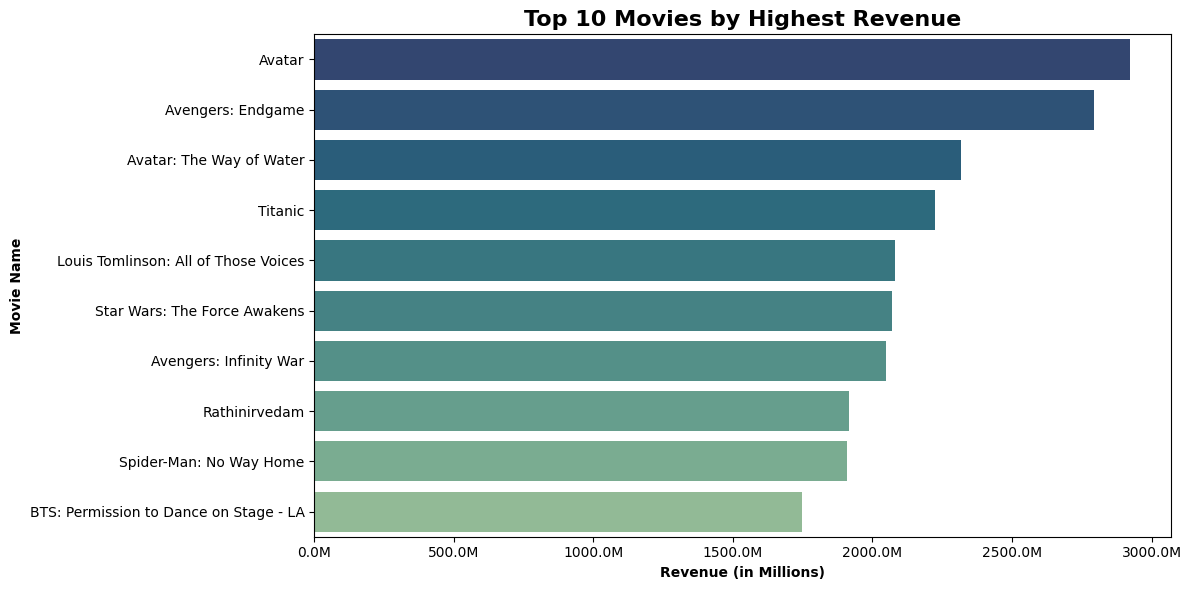

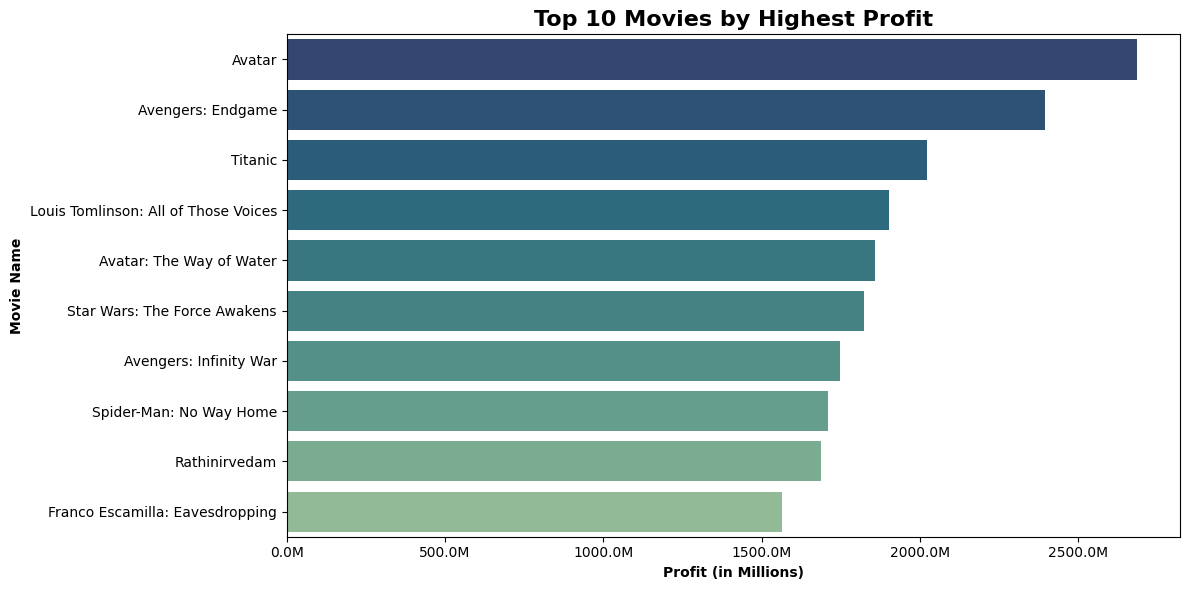

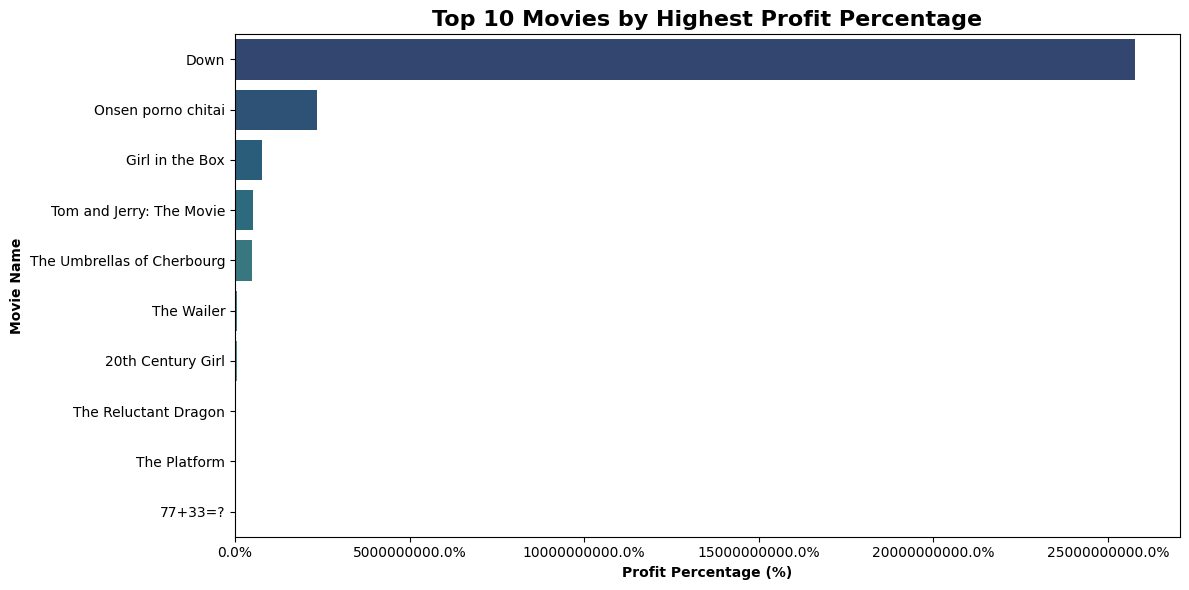

In [33]:
#Analysing the top 10 movies based on Revenue, Profit and Profit Percentage
df['Profit'] = df['Revenue'] - df['Budget']
df['Profit Percentage'] = (df['Profit'] / df['Budget']) * 100
top_revenue = df.sort_values(by='Revenue', ascending=False).head(11)
top_profit = df.sort_values(by='Profit', ascending=False).head(11)
top_profit_percentage = df.sort_values(by='Profit Percentage', ascending=False).head(10)
# Plot Top 10 Movies by Revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='Revenue', y='Name', data=top_revenue, palette='crest_r', hue='Name', legend=False)
plt.title('Top 10 Movies by Highest Revenue', fontsize=16,fontweight='bold')
plt.xlabel('Revenue (in Millions)', fontweight='bold')
plt.ylabel('Movie Name', fontweight='bold')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.tight_layout()
plt.show()
print()
# Plot Top 10 Movies by Profit
plt.figure(figsize=(12, 6))
sns.barplot(x='Profit', y='Name', data=top_profit, palette='crest_r', hue='Name', legend=False)
plt.title('Top 10 Movies by Highest Profit', fontsize=16,fontweight='bold')
plt.xlabel('Profit (in Millions)',fontweight='bold')
plt.ylabel('Movie Name',fontweight='bold')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.tight_layout()
plt.show()
print()
# Plot Top 10 Movies by Profit Percentage
plt.figure(figsize=(12, 6))
sns.barplot(x='Profit Percentage', y='Name', data=top_profit_percentage, palette='crest_r', hue='Name', legend=False)
plt.title('Top 10 Movies by Highest Profit Percentage', fontsize=16,fontweight='bold')
plt.xlabel('Profit Percentage (%)',fontweight='bold')
plt.ylabel('Movie Name',fontweight='bold')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))
plt.tight_layout()
plt.show()

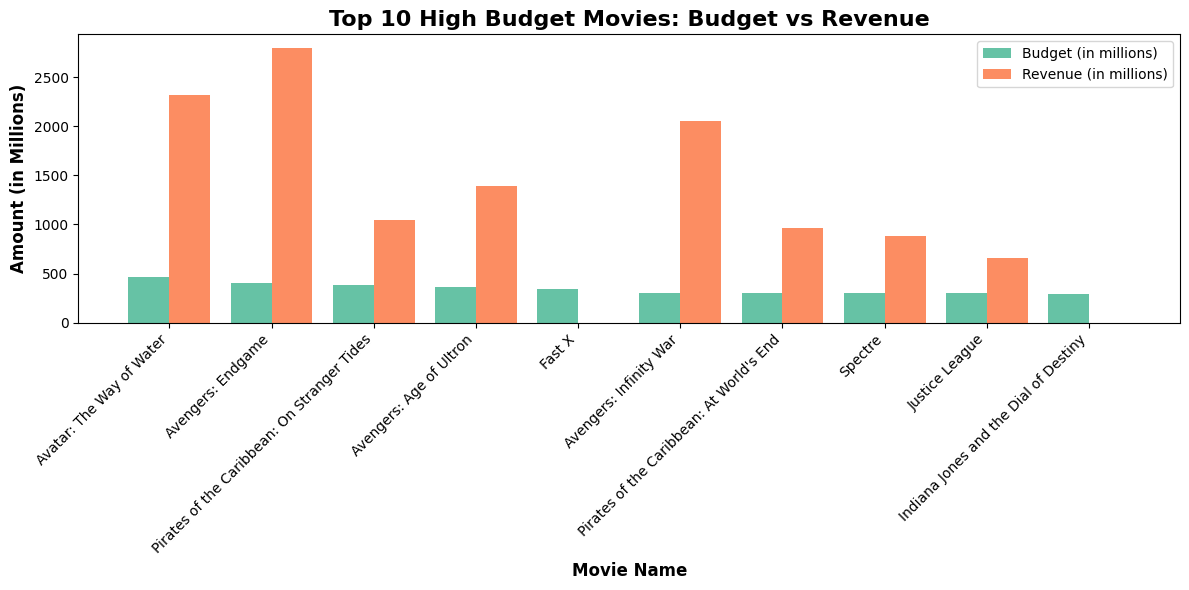

In [34]:
# Plot of the top 10 highest-budget movies and their collections
df_unique = df.drop_duplicates(subset='Name')
top_budget_movies = df_unique.sort_values(by='Budget', ascending=False).head(10)
palette = sns.color_palette('Set2',2)
plt.figure(figsize=(12, 6))
bar_width = 0.4
positions = range(len(top_budget_movies))
plt.bar(positions, top_budget_movies['Budget'] / 1e6, width=bar_width, label='Budget (in millions)', color=palette[0])
plt.bar([p + bar_width for p in positions], top_budget_movies['Revenue'] / 1e6, width=bar_width, label='Revenue (in millions)', color=palette[1])
plt.title('Top 10 High Budget Movies: Budget vs Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Movie Name', fontsize=12, fontweight='bold')
plt.ylabel('Amount (in Millions)', fontsize=12, fontweight='bold')
plt.xticks([p + bar_width / 2 for p in positions], top_budget_movies['Name'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

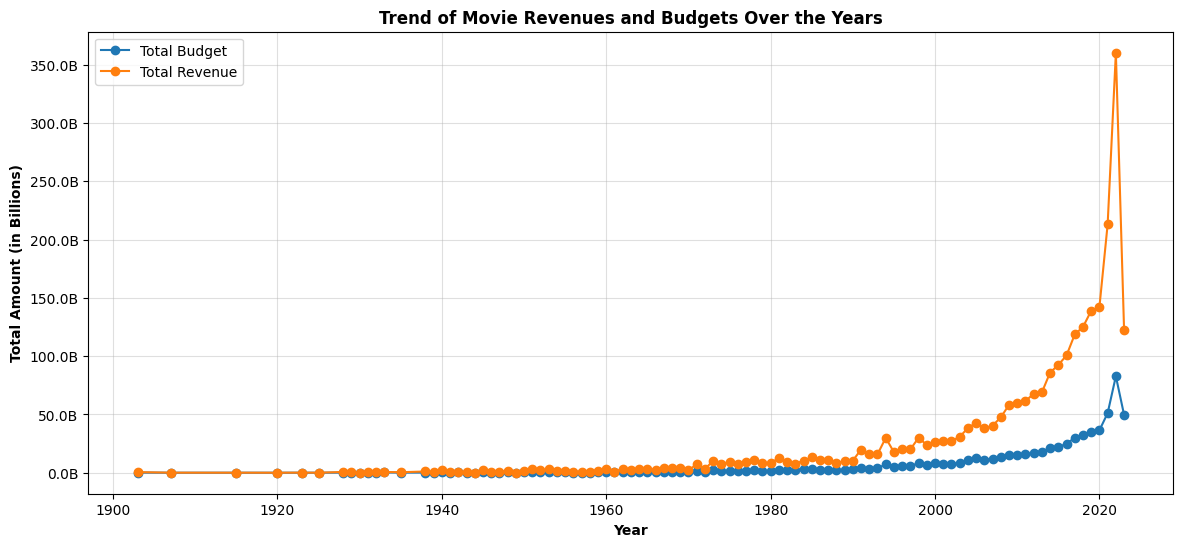

In [14]:
# Plotting the trend of revenues and budgets over the years
import matplotlib.ticker as mticker
annual_revenue = df.groupby('Year')['Revenue'].sum()
annual_budget = df.groupby('Year')['Budget'].sum()
plt.figure(figsize=(14, 6))
plt.plot(annual_budget, label='Total Budget', marker='o')
plt.plot(annual_revenue, label='Total Revenue', marker='o')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B'))
plt.title('Trend of Movie Revenues and Budgets Over the Years', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Total Amount (in Billions)', fontweight='bold')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

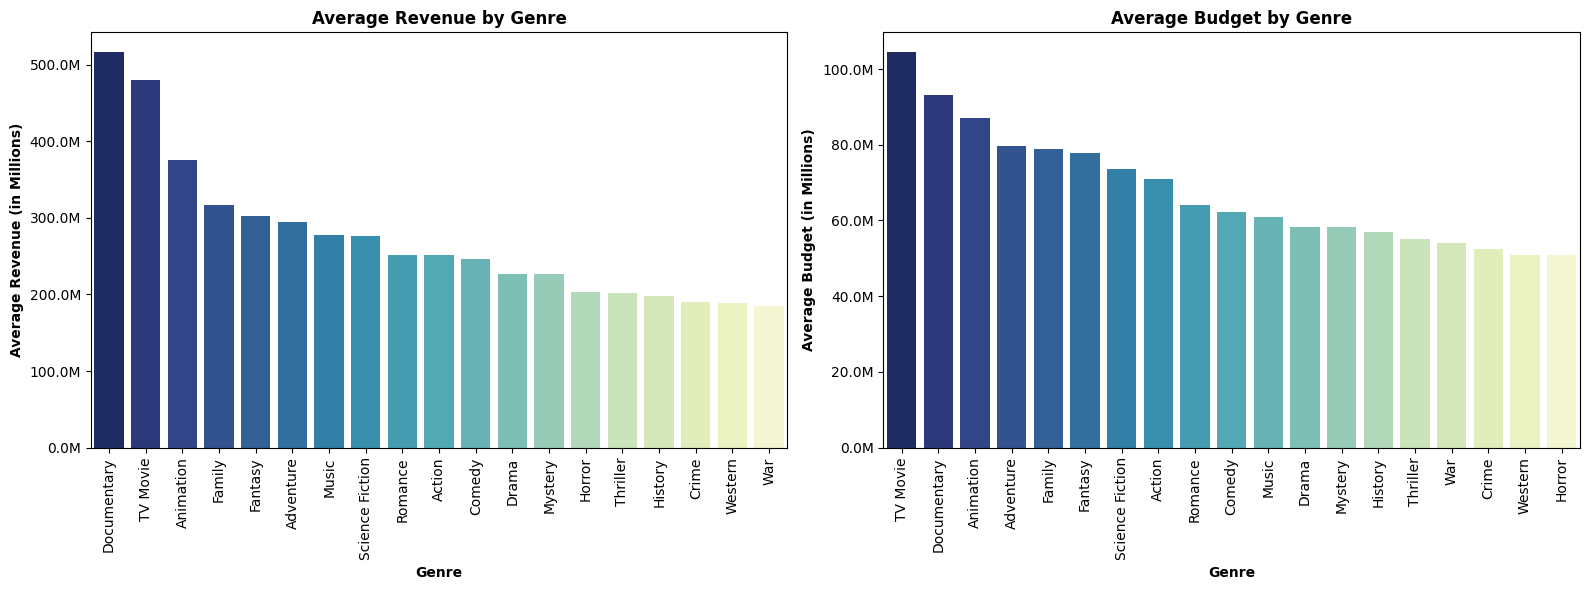

In [35]:
# Analysis based on Average Revenue and Budget by Genre
df['Genres'] = df['Genre'].str.split(',')
df = df.explode('Genres')
genre_revenue = df.groupby('Genres')['Revenue'].mean().sort_values(ascending=False)
genre_budget = df.groupby('Genres')['Budget'].mean().sort_values(ascending=False)
color_palette = sns.color_palette('YlGnBu_r', len(genre_revenue))

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=genre_revenue.index, y=genre_revenue.values, hue=genre_revenue.index, legend=False, palette=color_palette)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.xticks(rotation=90)
plt.title('Average Revenue by Genre', fontweight='bold')
plt.xlabel('Genre', fontweight='bold')
plt.ylabel('Average Revenue (in Millions)', fontweight='bold')

plt.subplot(1, 2, 2)
sns.barplot(x=genre_budget.index, y=genre_budget.values, hue=genre_budget.index, legend=False,palette=color_palette)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.xticks(rotation=90)
plt.title('Average Budget by Genre', fontweight='bold')
plt.xlabel('Genre', fontweight='bold')
plt.ylabel('Average Budget (in Millions)', fontweight='bold')
plt.tight_layout()
plt.show()

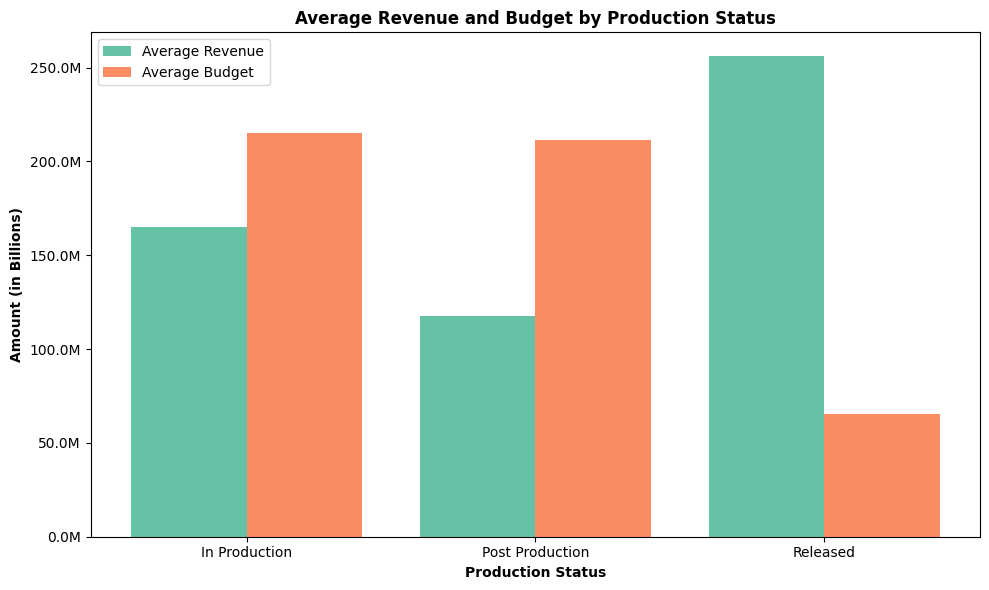

In [16]:
# Analysis based on Production Status
status_data = df.groupby('Status')[['Revenue', 'Budget']].mean()
status_data = status_data.reset_index()
palette = sns.color_palette('Set2', 2)
plt.figure(figsize=(10, 6))
bar_width = 0.40
x = np.arange(len(status_data['Status']))
plt.bar(x - bar_width / 2, status_data['Revenue'], width=bar_width, color=palette[0], label='Average Revenue')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.bar(x + bar_width / 2, status_data['Budget'], width=bar_width, color=palette[1], label='Average Budget')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.title('Average Revenue and Budget by Production Status', fontweight='bold')
plt.xlabel('Production Status', fontweight='bold')
plt.ylabel('Amount (in Billions)', fontweight='bold')
plt.xticks(x, status_data['Status'])
plt.legend()
plt.tight_layout()
plt.show()

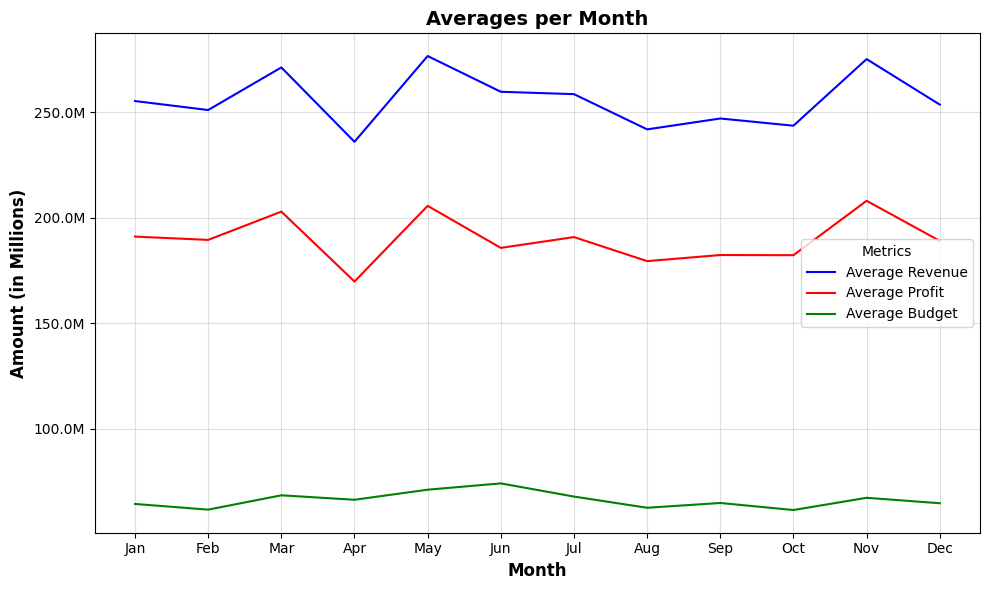

In [17]:
#Correlation of Average Profits, Revenue and Budgets on a monthly basis
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Month'] = df['Release Date'].dt.month
df['Profit'] = df['Revenue'] - df['Budget']
monthly_data = df.groupby('Month').agg({
    'Revenue': 'mean',
    'Budget': 'mean',
    'Profit': 'mean'
})
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_data.index, y=monthly_data['Revenue'], label='Average Revenue', color='blue')
sns.lineplot(x=monthly_data.index, y=monthly_data['Profit'], label='Average Profit', color='red')
sns.lineplot(x=monthly_data.index, y=monthly_data['Budget'], label='Average Budget', color='green')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.title('Averages per Month', fontsize=14, fontweight='bold')
plt.ylabel('Amount (in Millions)', fontsize=12, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.4)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

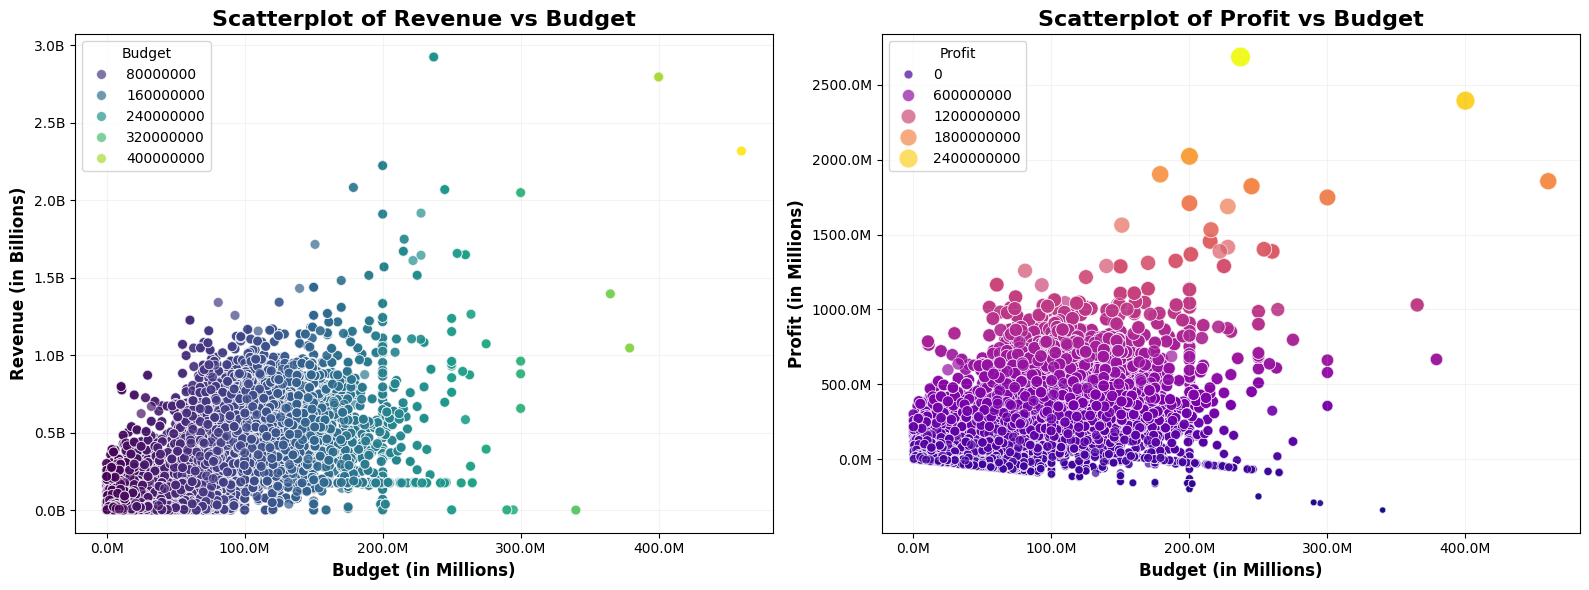

In [18]:
#Correlation of Revenue and Profit with Budget
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(ax=axes[0],x='Budget',y='Revenue',data=df,hue='Budget',palette='viridis',s=50,alpha=0.7)
axes[0].set_title('Scatterplot of Revenue vs Budget', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Budget (in Millions)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Revenue (in Billions)', fontsize=12, fontweight='bold')
axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{y/1e9:.1f}B'))
axes[0].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
axes[0].grid(True, alpha=0.15)
sns.scatterplot(ax=axes[1],x='Budget',y='Profit',data=df,hue='Profit',palette='plasma',size='Profit',sizes=(20, 200),alpha=0.7)
axes[1].set_title('Scatterplot of Profit vs Budget', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Budget (in Millions)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Profit (in Millions)', fontsize=12, fontweight='bold')
axes[1].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{y/1e6:.1f}M'))
axes[1].grid(True, alpha=0.15)
plt.tight_layout()
plt.show()

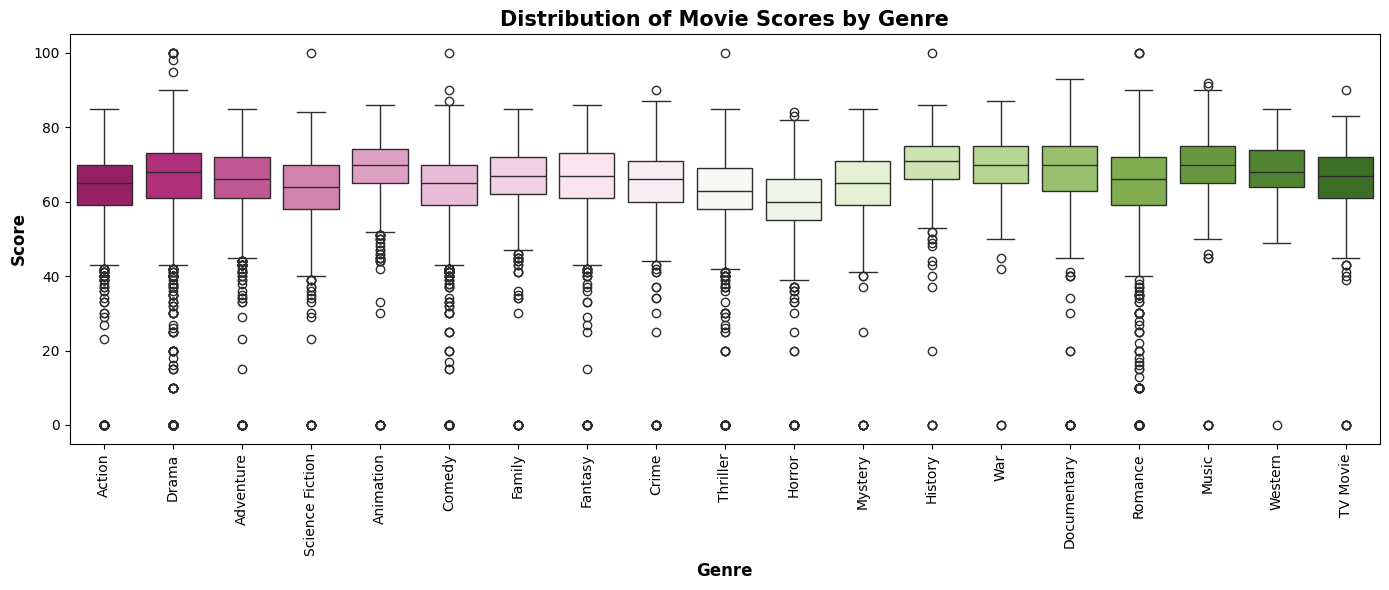

In [19]:
# Box Plots for Movie Scores for different Genre
plt.figure(figsize=(14, 6))
sns.boxplot(x='Genres', y='Score', data=df, palette='PiYG', hue='Genres',legend=False)
plt.xticks(rotation=90)
plt.title('Distribution of Movie Scores by Genre', fontweight='bold', fontsize=15)
plt.xlabel('Genre', fontweight='bold', fontsize=12)
plt.ylabel('Score', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

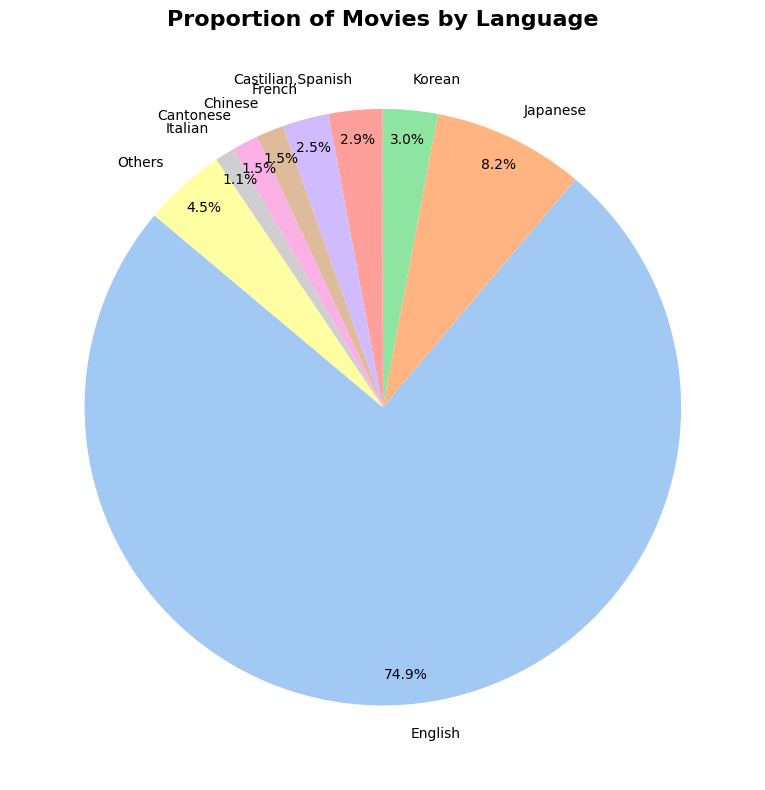

In [20]:
# Calculation of language counts and their proportions through Pie Plot
language_count = df['Original Language'].value_counts()
total_movies = language_count.sum()
filtered_languages = language_count[language_count / total_movies >= 0.01]
others_count = language_count[language_count / total_movies < 0.01].sum()
if others_count > 0:
    filtered_languages['Others'] = others_count
plt.figure(figsize=(8, 8))
plt.pie(filtered_languages.values, labels=filtered_languages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), pctdistance=0.9, labeldistance=1.1)
plt.title('Proportion of Movies by Language', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

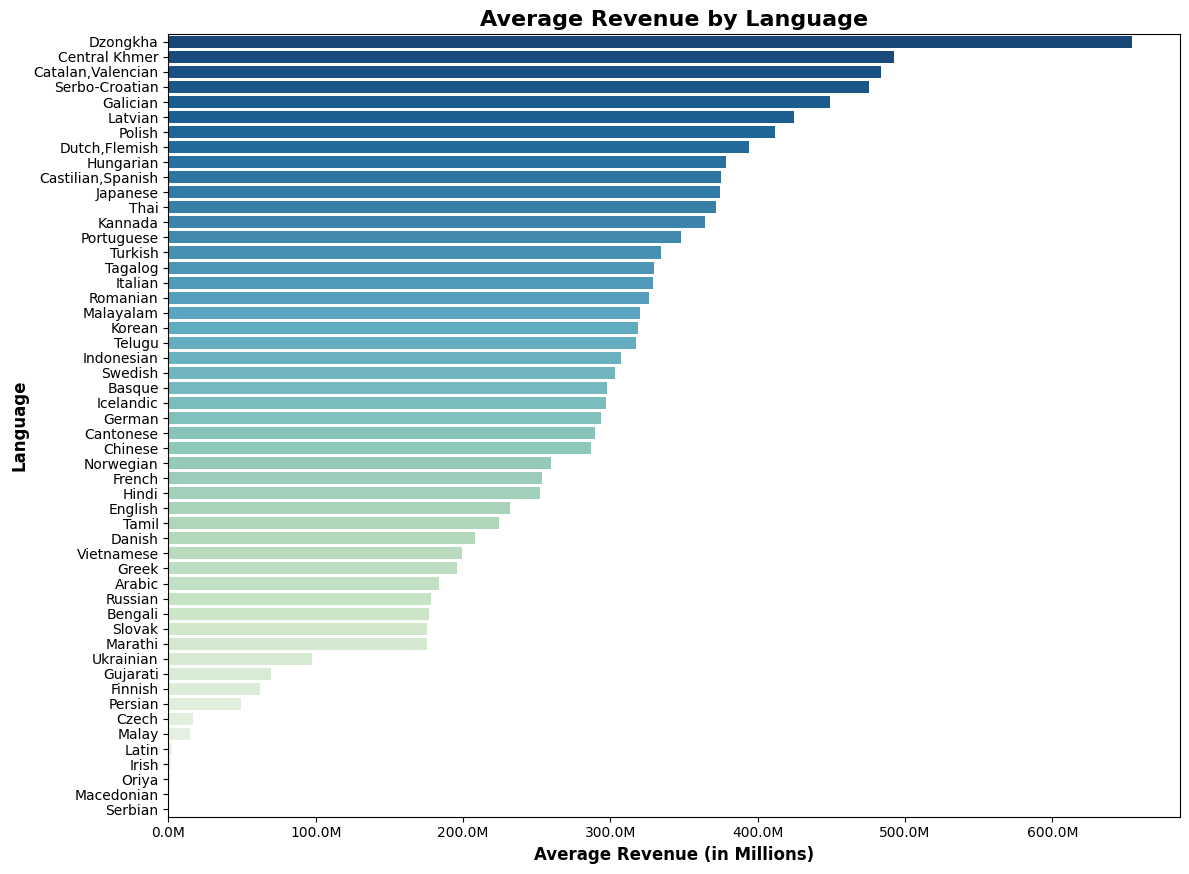

In [21]:
# Calculation of average revenue by language and sorting them by Bar Plot
avg_revenue_language = df.groupby('Original Language')['Revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, len(avg_revenue_language) * 0.17))
sns.barplot(x=avg_revenue_language.values, y=avg_revenue_language.index, hue=avg_revenue_language.index, legend=False, palette='GnBu_r')
plt.title('Average Revenue by Language', fontsize=16, fontweight='bold')
plt.xlabel('Average Revenue (in Millions)', fontsize=12, fontweight='bold')
plt.ylabel('Language', fontsize=12, fontweight='bold')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.tight_layout()
plt.show()

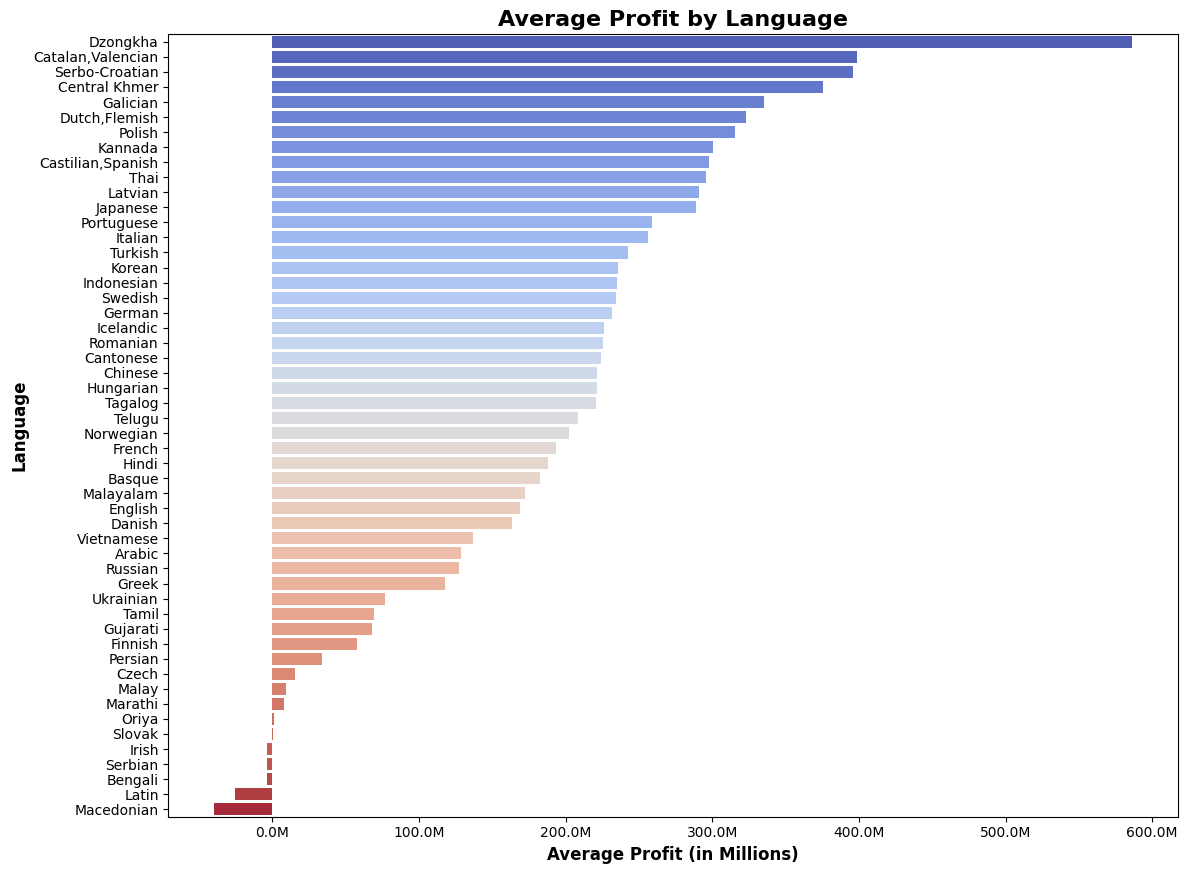

In [22]:
# Calculation of average profit by language and sorting them by Bar Plot
avg_profit_language = df.groupby('Original Language')['Profit'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, len(avg_profit_language) * 0.17))
sns.barplot(x=avg_profit_language.values, y=avg_profit_language.index, hue=avg_revenue_language.index, legend=False, palette='coolwarm')
plt.title('Average Profit by Language', fontsize=16, fontweight='bold')
plt.xlabel('Average Profit (in Millions)', fontsize=12, fontweight='bold')
plt.ylabel('Language', fontsize=12, fontweight='bold')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.tight_layout()
plt.show()

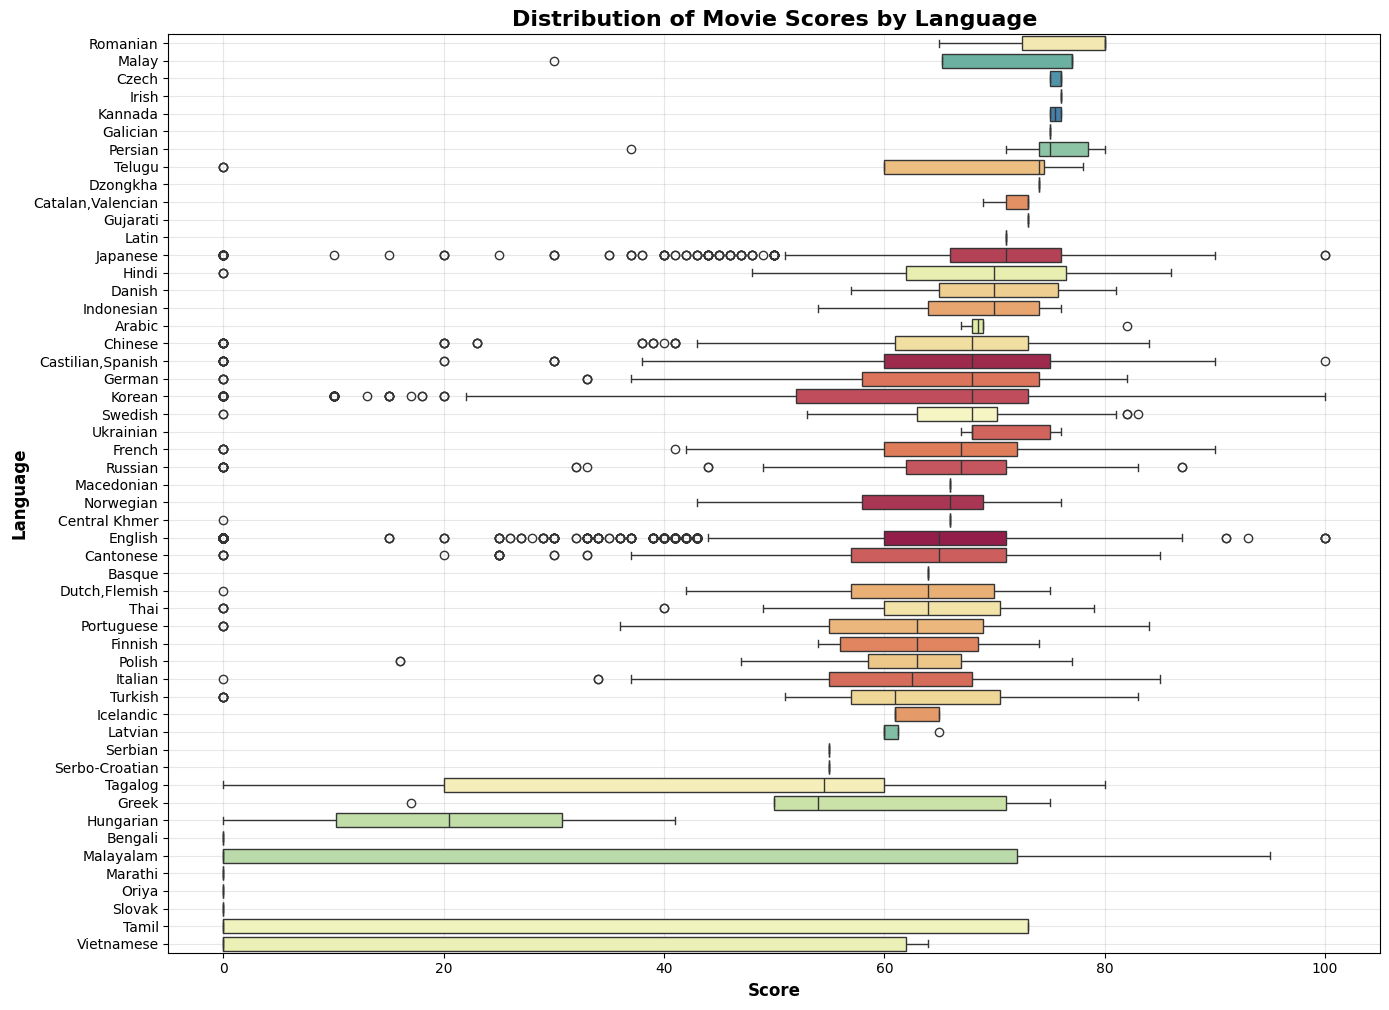

In [23]:
#Correlation between Languages and Ratings by Box Plots
plt.figure(figsize=(14, len('Original Language') * 0.6))
sns.boxplot(y='Original Language', x='Score', data=df, order=df.groupby('Original Language')['Score'].median().sort_values(ascending=False).index, hue='Original Language', legend=False,palette='Spectral')
plt.title('Distribution of Movie Scores by Language', fontsize=16, fontweight='bold')
plt.xlabel('Score', fontsize=12, fontweight='bold')
plt.ylabel('Language', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()

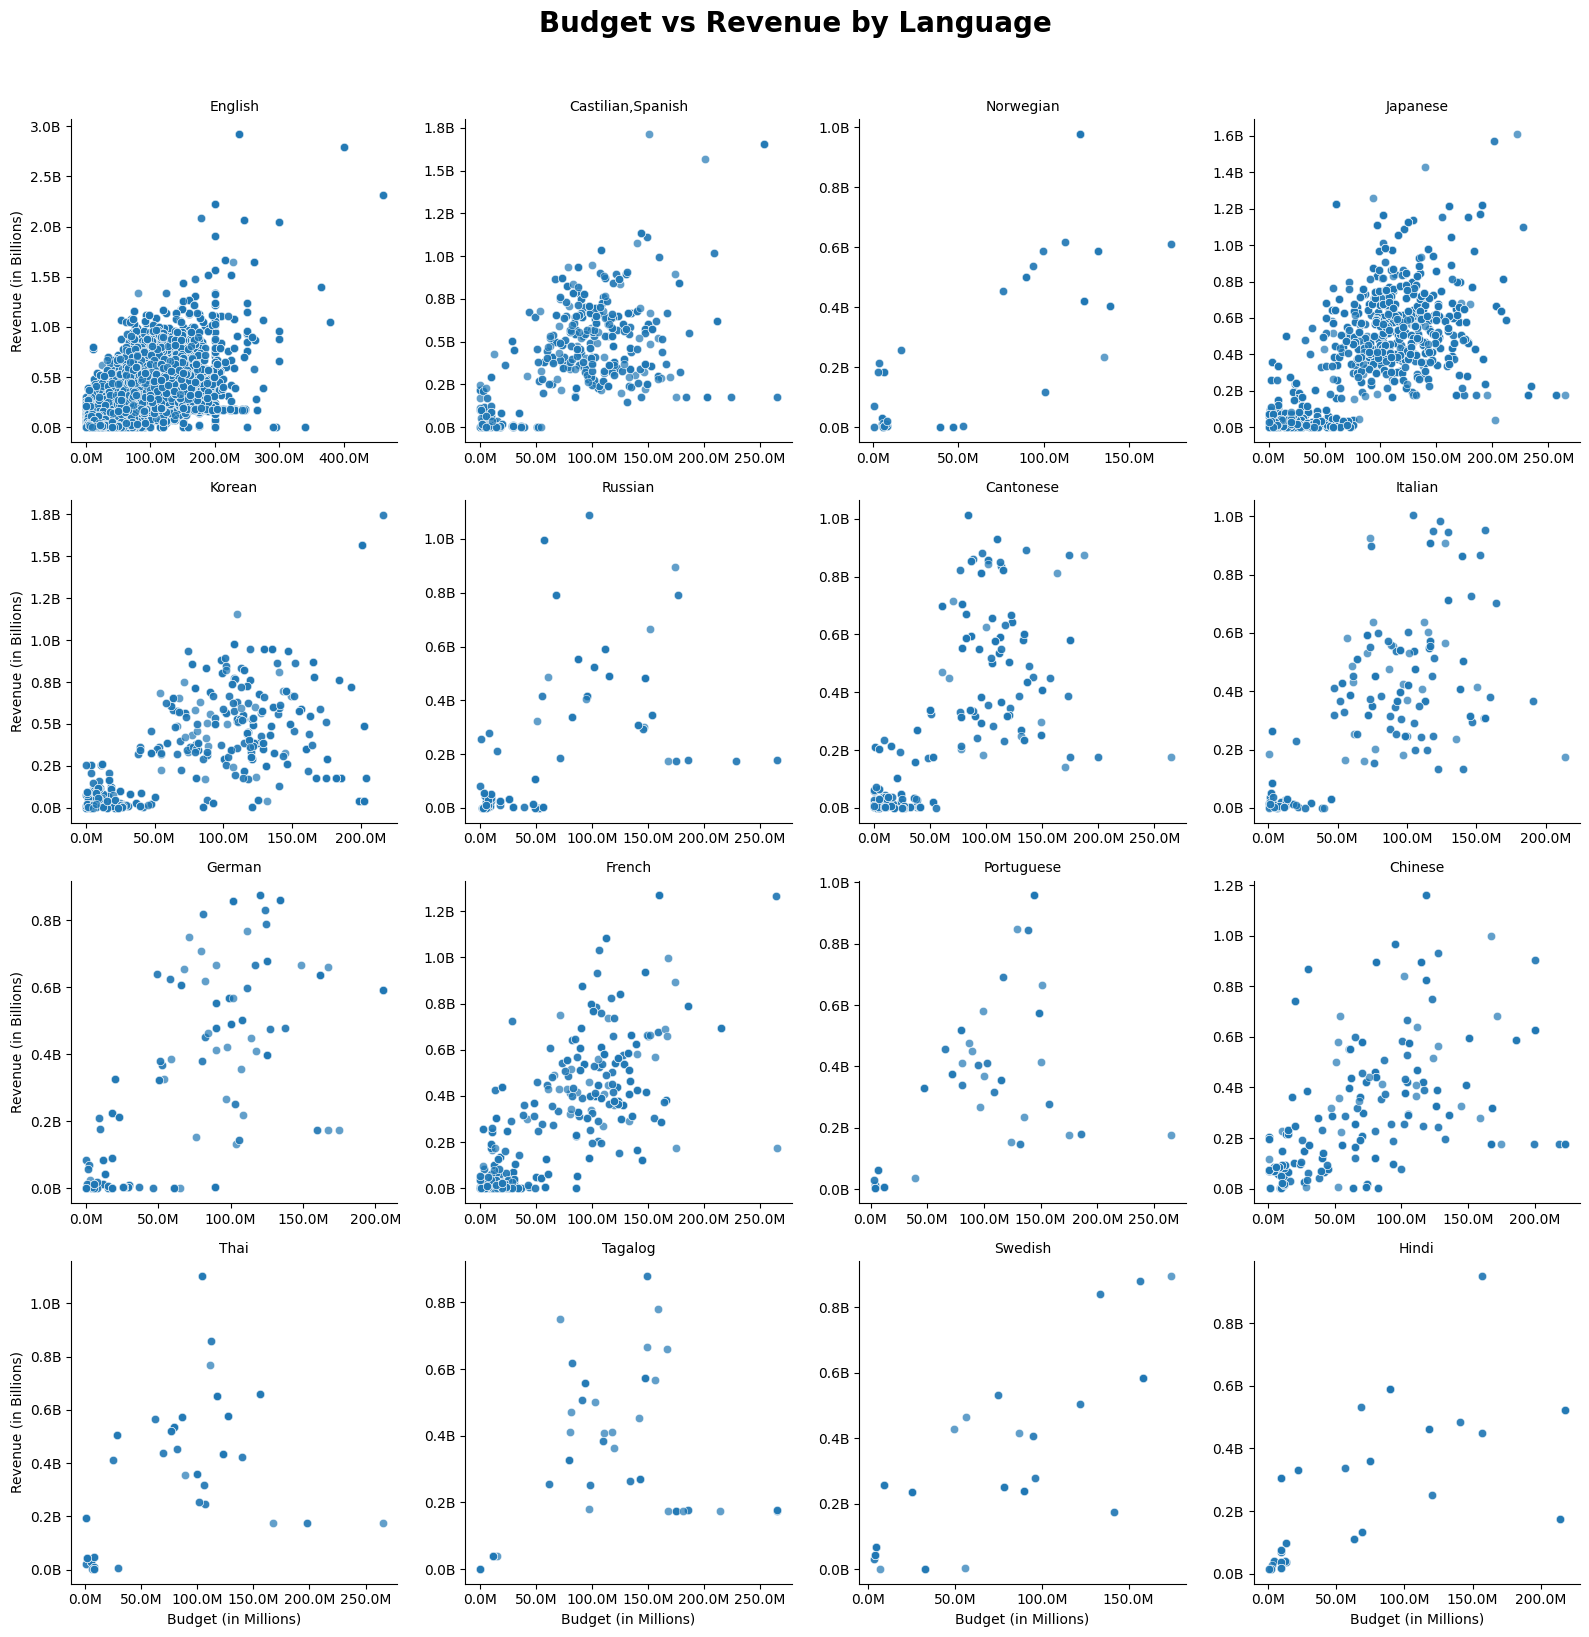

In [24]:
#Correlation of Budget vs Revenue for each Language
language_counts = df['Original Language'].value_counts()
valid_languages = language_counts[language_counts >=52].index
filtered_df = df[df['Original Language'].isin(valid_languages)]
def set_axis_format(ax):
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{y/1e9:.1f}B'))
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
g = sns.FacetGrid(filtered_df, col='Original Language', col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.scatterplot, 'Budget', 'Revenue', alpha=0.7)
for ax in g.axes.flat:
    set_axis_format(ax)
g.set_titles('{col_name}')
g.set_axis_labels('Budget (in Millions)', 'Revenue (in Billions)')
g.fig.suptitle('Budget vs Revenue by Language', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()